## Computational Grant: Study of Brain Diseases (Figures)

Script is based on `neuroblstoma.ipynb` notebook sections:
- **Fig: GBM subtype per Sample (GSEA)** performed in October 30th 2021
- **Fig % Retrotransposons** performed in September 3rd, 2021

In [1]:
#load libraries and scripts
.libPaths(c("/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu","/tmp/RtmpJsRC8Z/renv-system-library", .libPaths()))
.libPaths()

resultsPath <- "~/scratch/gete-gbm/results"
getwd()

library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(genefilter)
library(tidyverse)
library(RCurl)
library(scales)
# library(SingleCellExperiment)
library(AnnotationHub)
library(ensembldb)
# Packages for figure layout formatting
library(grid)
library(gridExtra)

source("~/scratch/gete-gbm/bin/util.R")
source("~/scratch/gete-gbm/bin/util_go.R")
source("~/scratch/gete-gbm/bin/util_seurat.R")
source("~/scratch/gete-gbm/bin/util_viz.R")

[1] "/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu"                       
[2] "/home/samkyy/R/x86_64-pc-linux-gnu-library/4.0"                                        
[3] "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/r/4.0.2/lib64/R/library"

[1] "/scratch/samkyy/gete-gbm/results"

Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ readr::spec()   masks genefilter::spec()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘packag

## GSEA Figure
2021-11-11:

In [25]:
s_objs <- vector(mode="list", length=2)
s_objs[[1]] <- readRDS("~/scratch/gete-gbm/results/GBMSC_GSEA-aug31/ge_gbmscIntUmap-subtypes.rds")
s_objs[[2]] <- readRDS("~/scratch/gete-gbm/results/GBMSC_GSEA-aug31/gte_gbmscIntUmap-subtypes.rds")

In [5]:
head(s_objs[[1]]@meta.data)
head(s_objs[[2]]@meta.data)

orig.ident nUMI  nGene log10GenesPerUMI mitoRatio  
GBM_AAACCTGCAATTCCTT-1 1          11916 4509  0.8964581        0.008308157
GBM_AAACCTGCACAGAGGT-1 1           4061 1671  0.8931295        0.068456045
GBM_AAACCTGGTGTGGCTC-1 1           4314 2102  0.9140969        0.070931850
GBM_AAACGGGGTCCGAATT-1 1           7251 2943  0.8985577        0.084402151
GBM_AAACGGGTCGAATGGG-1 1           1708 1049  0.9345048        0.066159251
GBM_AAAGATGGTCTCAACA-1 1           5158 2538  0.9170394        0.017642497
                       cells              sample    nCount_RNA nFeature_RNA
GBM_AAACCTGCAATTCCTT-1 AAACCTGCAATTCCTT-1 SF11159_2 11916      4509        
GBM_AAACCTGCACAGAGGT-1 AAACCTGCACAGAGGT-1 SF11159_2  4061      1671        
GBM_AAACCTGGTGTGGCTC-1 AAACCTGGTGTGGCTC-1 SF11159_2  4314      2102        
GBM_AAACGGGGTCCGAATT-1 AAACGGGGTCCGAATT-1 SF11159_2  7251      2943        
GBM_AAACGGGTCGAATGGG-1 AAACGGGTCGAATGGG-1 SF11159_2  1708      1049        
GBM_AAAGATGGTCTCAACA-1 AAAGATGGTCTCAACA-1 SF11159_2  5158      2538        
                       GBM_integrated_snn_res.0.8 ⋯ integrated_snn_res.0.7
GBM_AAACCTGCAATTCCTT-1 7                          ⋯ 1                     
GBM_AAACCTGCACAGAGGT-1 3                          ⋯ 8                     
GBM_AAACCTGGTGTGGCTC-1 0                          ⋯ 0                     
GBM_AAACGGGGTCCGAATT-1 0                          ⋯ 0                     
GBM_AAACGGGTCGAATGGG-1 0                          ⋯ 0                     
GBM_AAAGATGGTCTCAACA-1 14                         ⋯ 0                     
                       seurat_clusters MGMTme sampleCombined
GBM_AAACCTGCAATTCCTT-1 3               TRUE   SF11159       
GBM_AAACCTGCACAGAGGT-1 4               TRUE   SF11159       
GBM_AAACCTGGTGTGGCTC-1 0               TRUE   SF11159       
GBM_AAACGGGGTCCGAATT-1 6               TRUE   SF11159       
GBM_AAACGGGTCGAATGGG-1 0               TRUE   SF11159       
GBM_AAAGATGGTCTCAACA-1 0               TRUE   SF11159       
                       integrated_snn_res.0.2 integrated_snn_res.0.3
GBM_AAACCTGCAATTCCTT-1 2                      2                     
GBM_AAACCTGCACAGAGGT-1 5                      5                     
GBM_AAACCTGGTGTGGCTC-1 0                      0                     
GBM_AAACGGGGTCCGAATT-1 0                      0                     
GBM_AAACGGGTCGAATGGG-1 0                      0                     
GBM_AAAGATGGTCTCAACA-1 0                      0                     
                       integrated_snn_res.0.4 integrated_snn_res.0.5
GBM_AAACCTGCAATTCCTT-1 1                      2                     
GBM_AAACCTGCACAGAGGT-1 3                      3                     
GBM_AAACCTGGTGTGGCTC-1 0                      0                     
GBM_AAACGGGGTCCGAATT-1 0                      0                     
GBM_AAACGGGTCGAATGGG-1 0                      0                     
GBM_AAAGATGGTCTCAACA-1 0                      7                     
                       integrated_snn_res.0.6 gbm_subtype          
GBM_AAACCTGCAATTCCTT-1 3                      Classical-Mesenchymal
GBM_AAACCTGCACAGAGGT-1 4                      Mesenchymal          
GBM_AAACCTGGTGTGGCTC-1 0                      Classical            
GBM_AAACGGGGTCCGAATT-1 6                      Classical            
GBM_AAACGGGTCGAATGGG-1 0                      Classical            
GBM_AAAGATGGTCTCAACA-1 0                      Classical

orig.ident nUMI  nGene log10GenesPerUMI mitoRatio  
GBM_AAACCTGCAATTCCTT-1 1          16712 4840  0.8725599        0.005923887
GBM_AAACCTGCACAGAGGT-1 1           5963 1850  0.8653694        0.046620828
GBM_AAACCTGGTGTGGCTC-1 1           7866 2355  0.8655554        0.038901602
GBM_AAACGGGGTCCGAATT-1 1          14361 3262  0.8451595        0.042615417
GBM_AAACGGGTCGAATGGG-1 1           2803 1201  0.8932366        0.040313949
GBM_AAAGATGGTCTCAACA-1 1           6865 2756  0.8966905        0.013255645
                       cells              sample    nCount_RNA nFeature_RNA
GBM_AAACCTGCAATTCCTT-1 AAACCTGCAATTCCTT-1 SF11232_1 16712      4840        
GBM_AAACCTGCACAGAGGT-1 AAACCTGCACAGAGGT-1 SF11232_1  5963      1850        
GBM_AAACCTGGTGTGGCTC-1 AAACCTGGTGTGGCTC-1 SF11232_1  7866      2355        
GBM_AAACGGGGTCCGAATT-1 AAACGGGGTCCGAATT-1 SF11232_1 14361      3262        
GBM_AAACGGGTCGAATGGG-1 AAACGGGTCGAATGGG-1 SF11232_1  2803      1201        
GBM_AAAGATGGTCTCAACA-1 AAAGATGGTCTCAACA-1 SF11232_1  6865      2756        
                       GBM_integrated_snn_res.0.8 ⋯ seurat_clusters MGMTme
GBM_AAACCTGCAATTCCTT-1 3                          ⋯ 0               TRUE  
GBM_AAACCTGCACAGAGGT-1 4                          ⋯ 5               TRUE  
GBM_AAACCTGGTGTGGCTC-1 0                          ⋯ 1               TRUE  
GBM_AAACGGGGTCCGAATT-1 0                          ⋯ 1               TRUE  
GBM_AAACGGGTCGAATGGG-1 0                          ⋯ 2               TRUE  
GBM_AAAGATGGTCTCAACA-1 8                          ⋯ 3               TRUE  
                       sampleCombined integrated_snn_res.0.2
GBM_AAACCTGCAATTCCTT-1 SF11232        1                     
GBM_AAACCTGCACAGAGGT-1 SF11232        4                     
GBM_AAACCTGGTGTGGCTC-1 SF11232        2                     
GBM_AAACGGGGTCCGAATT-1 SF11232        2                     
GBM_AAACGGGTCGAATGGG-1 SF11232        0                     
GBM_AAAGATGGTCTCAACA-1 SF11232        0                     
                       integrated_snn_res.0.3 integrated_snn_res.0.4
GBM_AAACCTGCAATTCCTT-1 1                      1                     
GBM_AAACCTGCACAGAGGT-1 4                      5                     
GBM_AAACCTGGTGTGGCTC-1 0                      0                     
GBM_AAACGGGGTCCGAATT-1 0                      0                     
GBM_AAACGGGTCGAATGGG-1 2                      3                     
GBM_AAAGATGGTCTCAACA-1 2                      2                     
                       integrated_snn_res.0.5 integrated_snn_res.0.6 teRatio 
GBM_AAACCTGCAATTCCTT-1 1                      0                      28.69794
GBM_AAACCTGCACAGAGGT-1 5                      5                      31.89670
GBM_AAACCTGGTGTGGCTC-1 0                      1                      45.13094
GBM_AAACGGGGTCCGAATT-1 0                      1                      49.49516
GBM_AAACGGGTCGAATGGG-1 2                      2                      39.06529
GBM_AAAGATGGTCTCAACA-1 2                      3                      24.85069
                       gbm_subtype          
GBM_AAACCTGCAATTCCTT-1 Classical-Mesenchymal
GBM_AAACCTGCACAGAGGT-1 Mesenchymal          
GBM_AAACCTGGTGTGGCTC-1 Classical            
GBM_AAACGGGGTCCGAATT-1 Classical            
GBM_AAACGGGTCGAATGGG-1 Classical-Proneural  
GBM_AAAGATGGTCTCAACA-1 Classical-Proneural

In [3]:
mkdirToday()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results"


Warning message in dir.create(file.path(maindir, subdir)):
"'/home/samkyy/scratch/gete-gbm/results/2021-11-11' already exists"


[1] "New working directory: /scratch/samkyy/gete-gbm/results/2021-11-11"


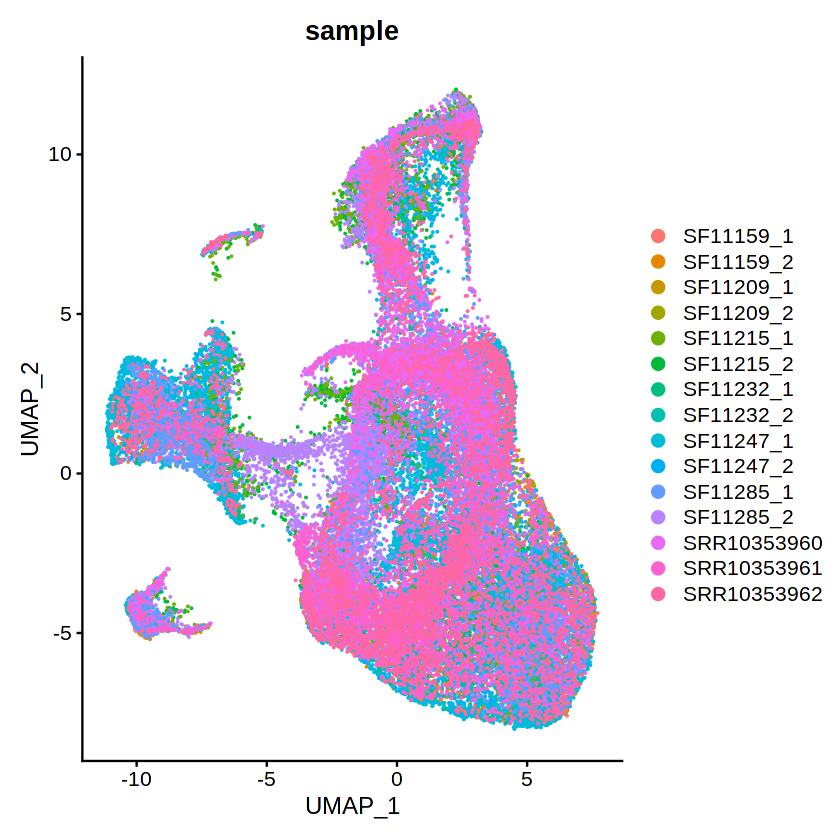

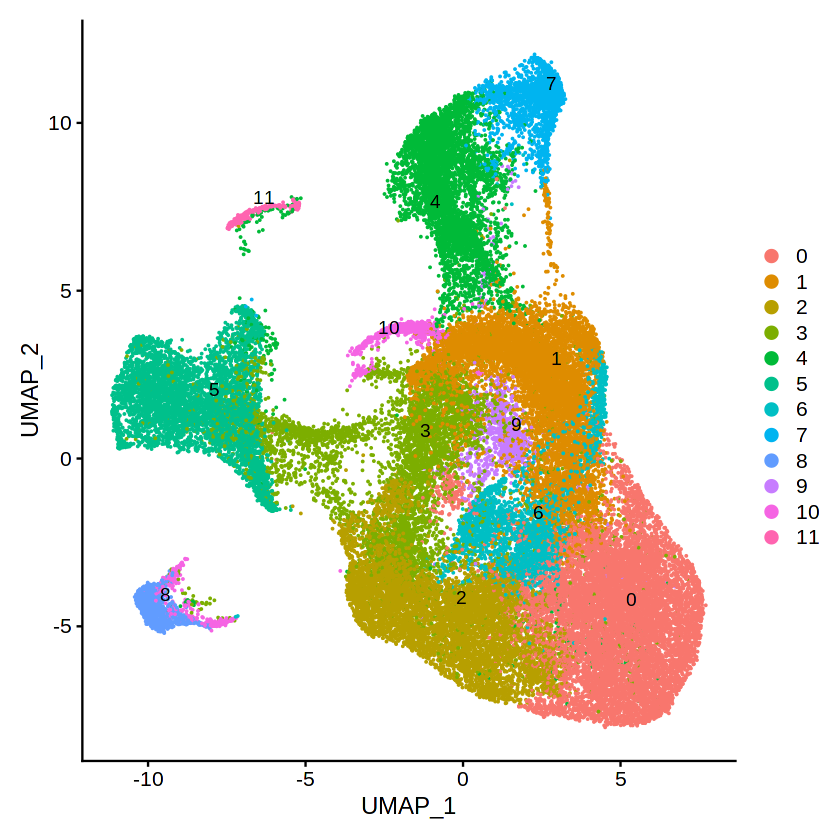

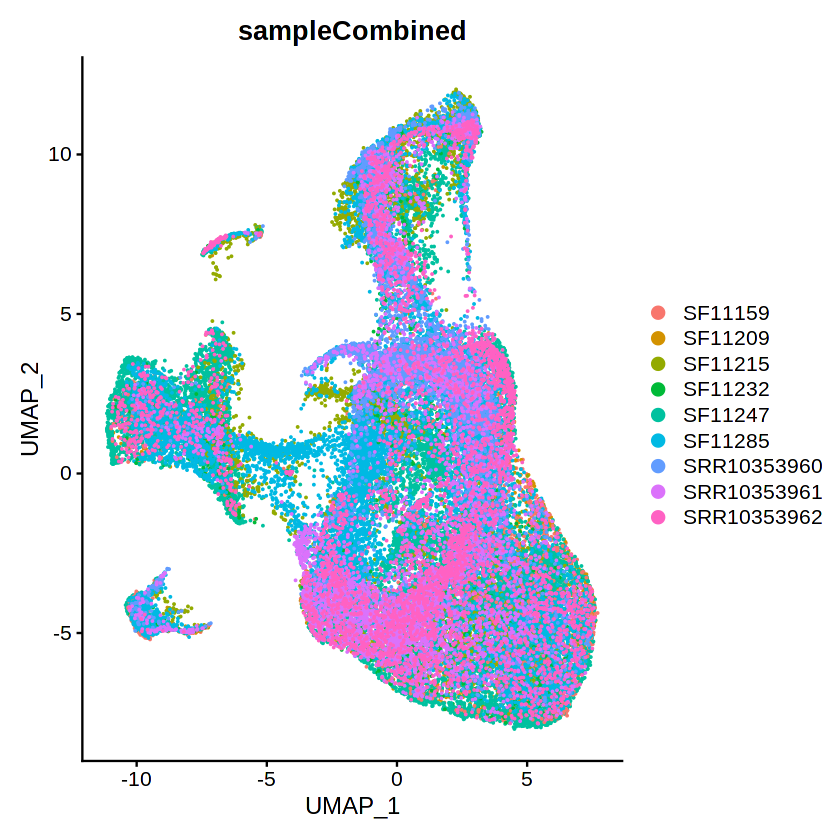

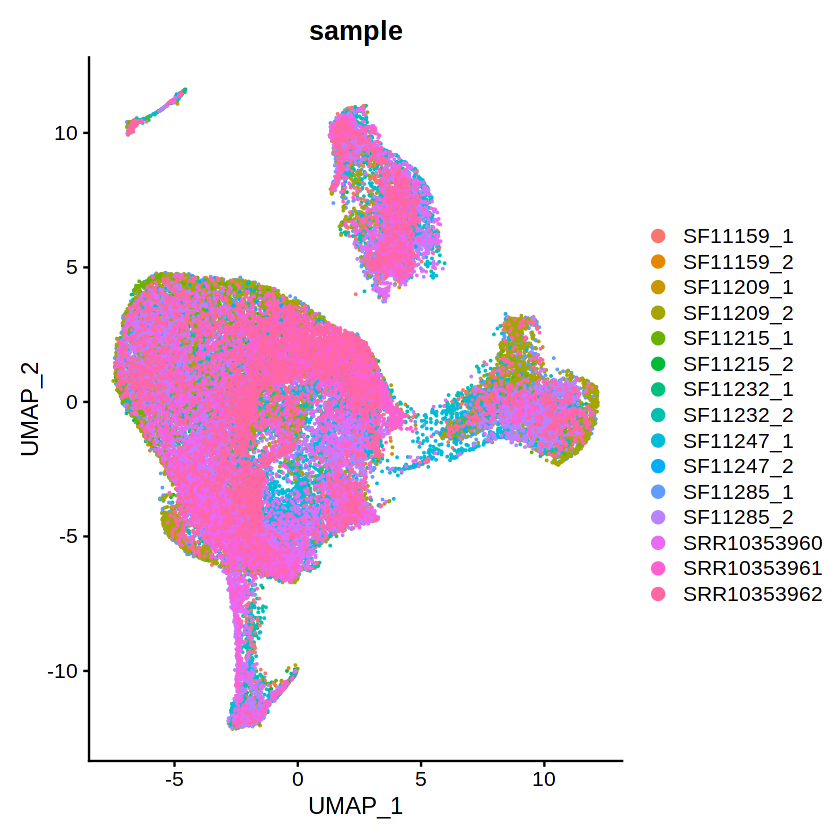

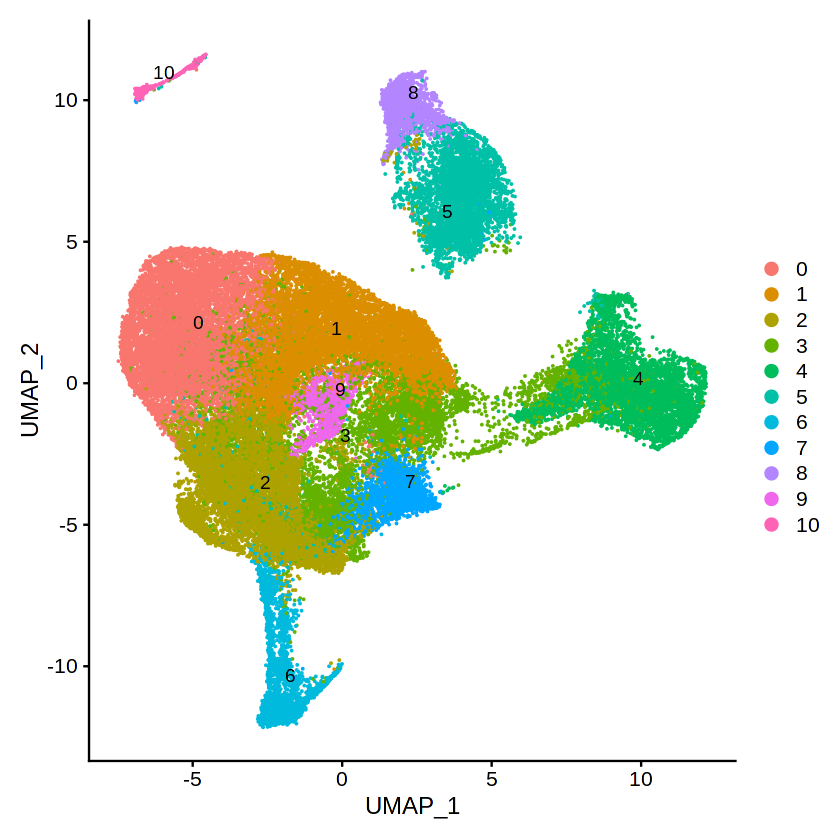

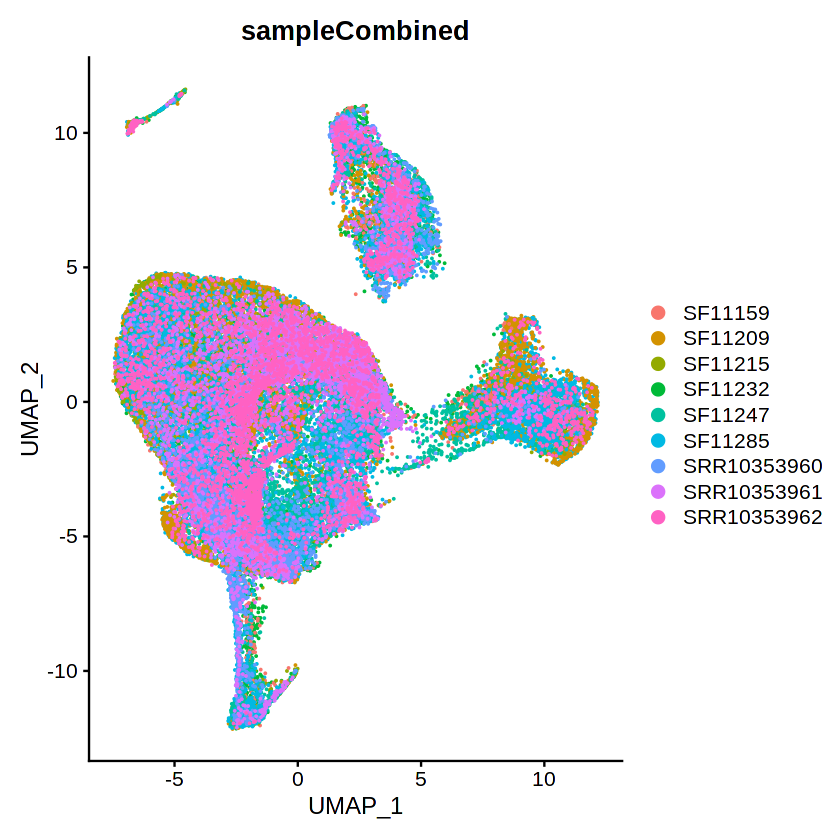

In [8]:
# UMAPs and Samples

# set cluster identities
Idents(s_objs[[1]]) <- "integrated_snn_res.0.3"
Idents(s_objs[[2]]) <- "integrated_snn_res.0.3"

# Produce Plots - hg38
DimPlot(s_objs[[1]], reduction = "umap", group.by = "sample") 
ggsave("gbmsc_PC20_r03_ge_sample.tiff", units="in", width=10, height=8, dpi=300, compression = 'lzw')

DimPlot(s_objs[[1]], reduction = "umap", label = TRUE, repel = TRUE)
ggsave("gbmsc_PC20_r03_ge_clusters.tiff", units="in", width=10, height=8, dpi=300, compression = 'lzw')

DimPlot(s_objs[[1]], reduction = "umap", group.by = "sampleCombined")
ggsave("gbmsc_PC20_r03_ge_sampleCombined.tiff", units="in", width=10, height=8, dpi=300, compression = 'lzw')

# Produce Plots - hg38 + Retrotransposons
DimPlot(s_objs[[2]], reduction = "umap", group.by = "sample")
ggsave("gbmsc_PC20_r03_gte_sample.tiff", units="in", width=10, height=8, dpi=300, compression = 'lzw')

DimPlot(s_objs[[2]], reduction = "umap", label = TRUE, repel = TRUE)
ggsave("gbmsc_PC20_r03_gte_cluster.tiff", units="in", width=10, height=8, dpi=300, compression = 'lzw')

DimPlot(s_objs[[2]], reduction = "umap", group.by = "sampleCombined")
ggsave("gbmsc_PC20_r03_gte_sampleCombined.tiff", units="in", width=10, height=8, dpi=300, compression = 'lzw')


In [26]:
unique(s_objs[[1]]$gbm_subtype)
s_objs[[1]]$gbm_subtype <- factor(s_objs[[1]]$gbm_subtype, 
                                  levels = c('Classical',
                                             'Mesenchymal',
                                             'Proneural',
                                             'Classical-Mesenchymal',
                                             'Mesenchymal-Proneural',
                                             'Classical-Proneural',
                                             'Other'),
                                  labels = c('CL',
                                             'MES',
                                             'PN',
                                             'CL-MES',
                                             'MES-PN',
                                             'CL-PN',
                                             'NA'))
levels(s_objs[[1]]$gbm_subtype)

[1] "Classical-Mesenchymal" "Mesenchymal"           "Classical"            
[4] "Classical-Proneural"   "Other"                 "Proneural"            
[7] "Mesenchymal-Proneural"

[1] "CL"     "MES"    "PN"     "CL-MES" "MES-PN" "CL-PN"  "NA"

In [27]:
unique(s_objs[[2]]$gbm_subtype)
s_objs[[2]]$gbm_subtype <- factor(s_objs[[2]]$gbm_subtype, 
                                  levels = c('Classical',
                                             'Mesenchymal',
                                             'Proneural',
                                             'Classical-Mesenchymal',
                                             'Mesenchymal-Proneural',
                                             'Classical-Proneural',
                                             'Other'),
                                  labels = c('CL',
                                             'MES',
                                             'PN',
                                             'CL-MES',
                                             'MES-PN',
                                             'CL-PN',
                                             'NA'))
levels(s_objs[[2]]$gbm_subtype)

[1] "Classical-Mesenchymal" "Mesenchymal"           "Classical"            
[4] "Classical-Proneural"   "Proneural"

[1] "CL"     "MES"    "PN"     "CL-MES" "MES-PN" "CL-PN"  "NA"

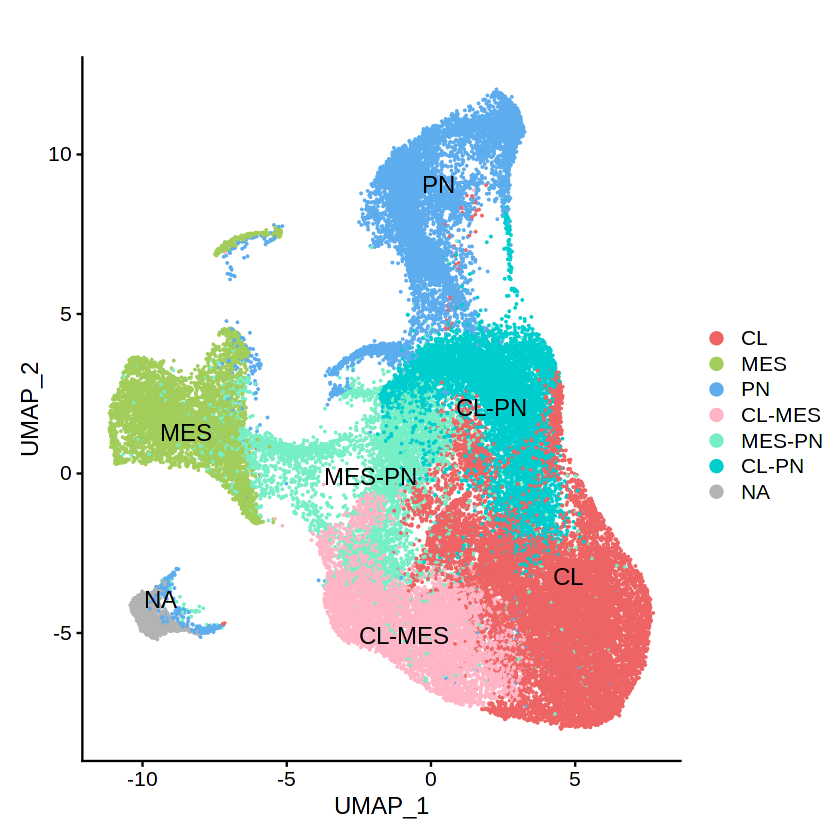

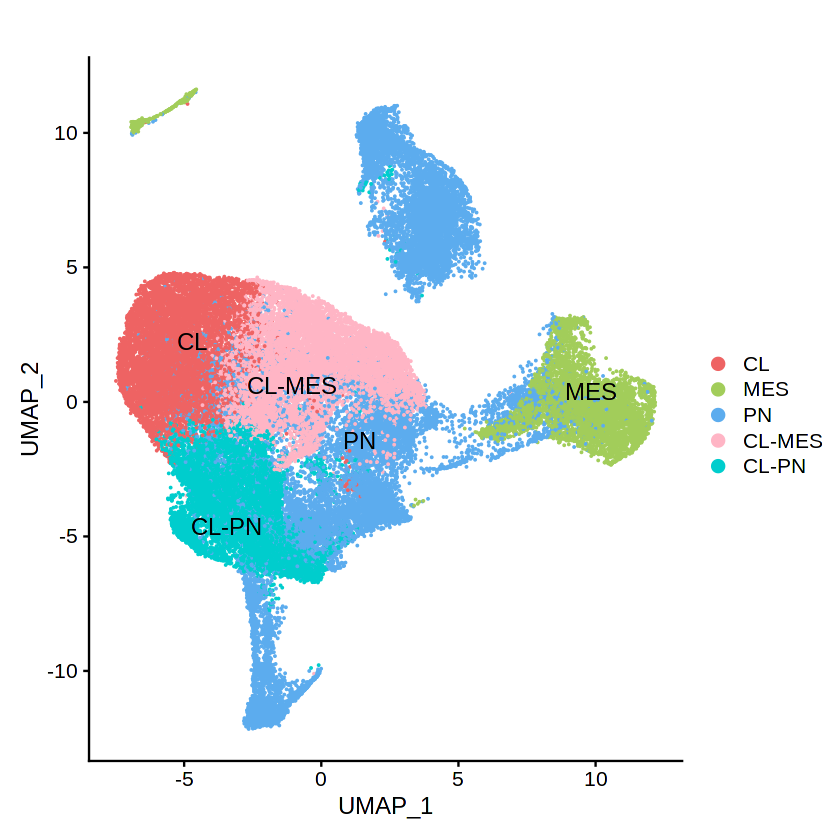

In [29]:
# With legends 

# Colours: same order as factored gbm_subtype levels. 
colours <- c("indianred2", "darkolivegreen3", "steelblue2", "pink1", "aquamarine2", "cyan3", "gray70")
retroCols <- c("indianred2", "darkolivegreen3", "steelblue2", "pink1", "cyan3") # missing MES-PN and NA


# Set Identities
Idents(s_objs[[1]]) <- "integrated_snn_res.0.3"
Idents(s_objs[[2]]) <- "integrated_snn_res.0.3"

# Produce Plots
DimPlot(s_objs[[1]], reduction = "umap", group.by = "gbm_subtype", 
        cols = colours, label = TRUE, repel = TRUE, label.size = 5) + ggtitle("") 
ggsave("gbmsc_PC20_r03_ge_subtypes.tiff", units="in", width=10, height=8, dpi=300, compression = 'lzw')
DimPlot(s_objs[[2]], reduction = "umap", group.by = "gbm_subtype", 
        cols = retroCols, label = TRUE, repel = TRUE, label.size = 5) + ggtitle("")
ggsave("gbmsc_PC20_r03_gte_subtypes.tiff", units="in", width=10, height=8, dpi=300, compression = 'lzw')

# Save figures
# size = 7
# pdf("~/scratch/gete-gbm/results/GBMSC_GSEA-aug31/GBMSC_gsea_UMAP-PC20r03.pdf", 
#     width = size*2, height = size*1.5)
# grid.arrange(p,p2,p3,p4, nrow = 2, top="GSEA Results")
# dev.off()

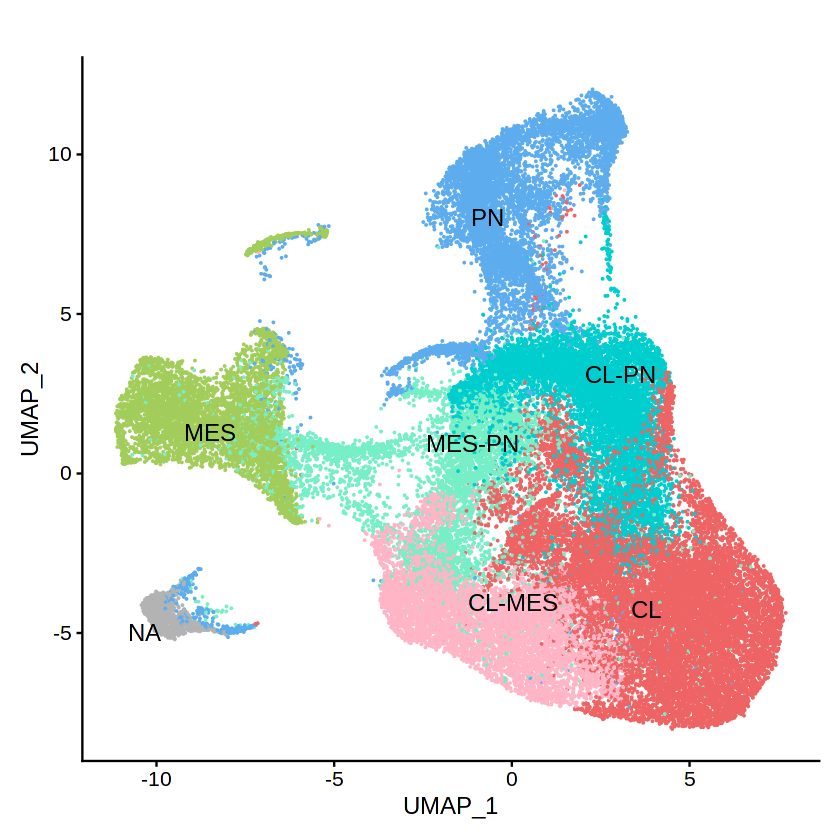

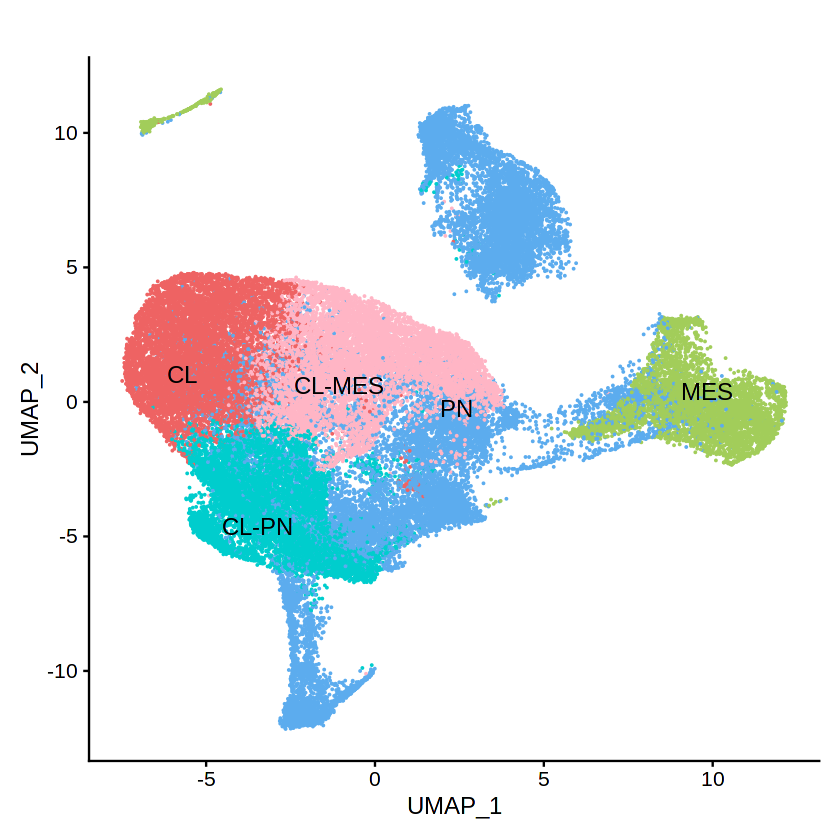

In [30]:
# Without legends

colours <- c("indianred2", "darkolivegreen3", "steelblue2", "pink1", "aquamarine2", "cyan3", "gray70")
retroCols <- c("indianred2", "darkolivegreen3", "steelblue2", "pink1", "cyan3") # missing MES-PN and NA

DimPlot(s_objs[[1]], reduction = "umap", group.by = "gbm_subtype", 
        cols = colours, label = TRUE, repel = TRUE, label.size = 5) + ggtitle("") & NoLegend()
ggsave("gbmsc_PC20_r03_ge_subtypes_nolegend.tiff", units="in", width=10, height=10, dpi=300, compression = 'lzw')
DimPlot(s_objs[[2]], reduction = "umap", group.by = "gbm_subtype", 
        cols = retroCols, label = TRUE, repel = TRUE, label.size = 5) + ggtitle("") & NoLegend()
ggsave("gbmsc_PC20_r03_gte_subtypes_nolegend.tiff", units="in", width=10, height=10, dpi=300, compression = 'lzw')

## Retrotransposon Figures
2021-11-11:

In [32]:
s_objs <- vector(mode="list", length=2)
s_objs[[2]] <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [20]:
summary(s_objs[[2]]$teRatio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.479  19.926  26.122  27.170  33.319  76.405 

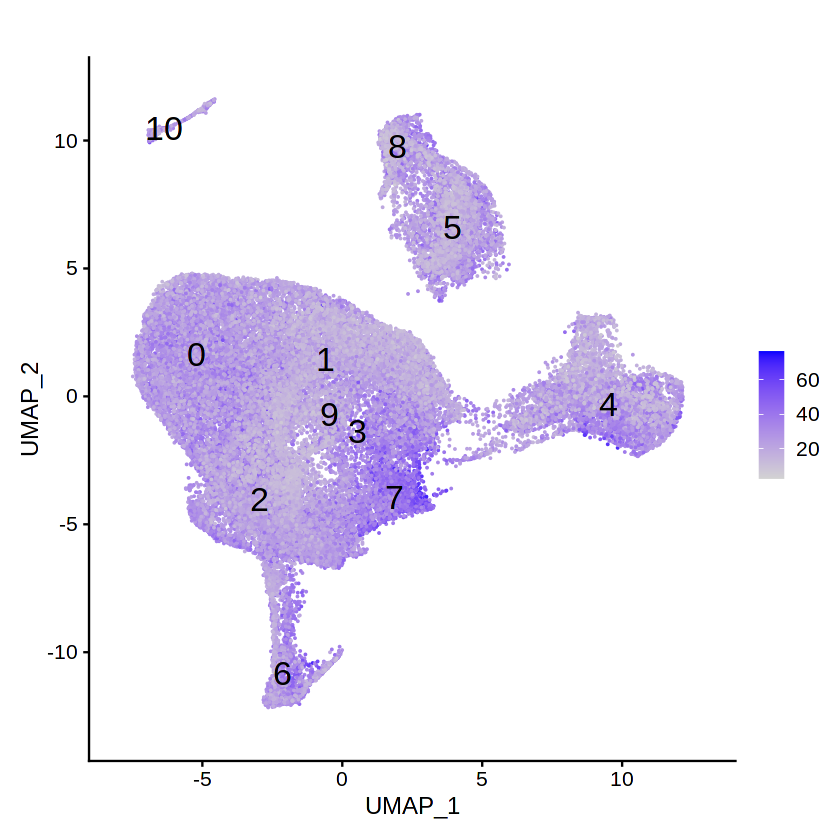

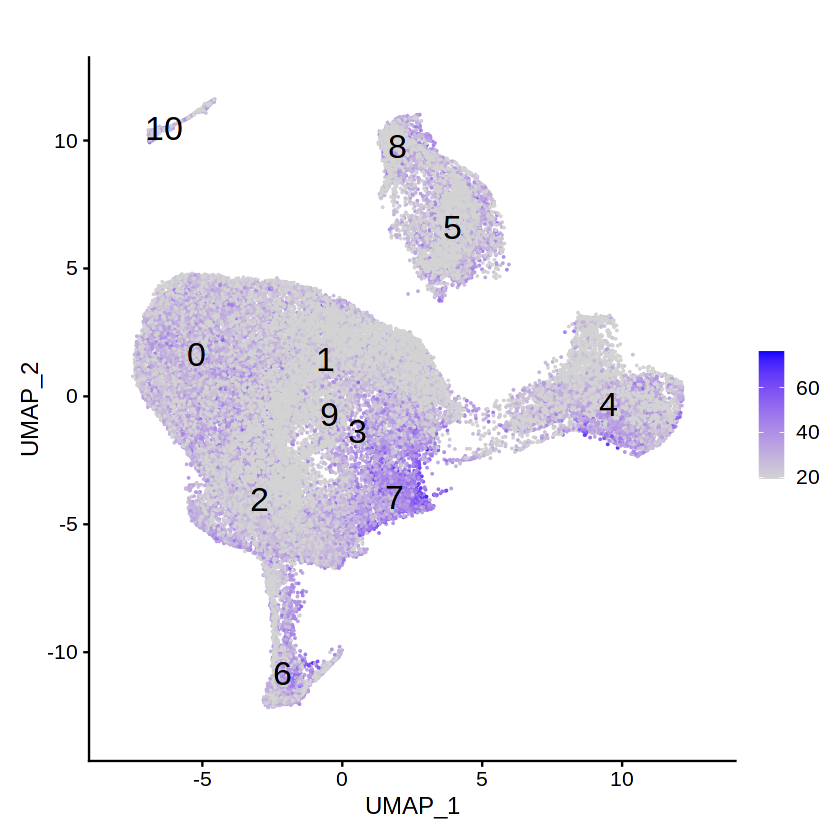

In [34]:
FeaturePlot(s_objs[[2]], features = "teRatio", reduction = "umap", label = TRUE, label.size = 7) + ggtitle("")
ggsave("gbmsc_PC20_r03_ge_teRatio.tiff", units="in", width=10, height=10, dpi=300, compression = 'lzw')

FeaturePlot(s_objs[[2]], features = "teRatio", reduction = "umap", min.cutoff=19.26, label = TRUE, label.size = 7) + ggtitle("")
ggsave("gbmsc_PC20_r03_gte_teRatio.tiff", units="in", width=10, height=10, dpi=300, compression = 'lzw')

## num Cluster 7 cells in each sample
2021-11-15:

In [2]:
s_objs <- vector(mode="list", length=2)
s_objs[[2]] <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [4]:
mkdirToday()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2021-11-15"


In [3]:
head(s_objs[[2]]@meta.data)

orig.ident nUMI  nGene log10GenesPerUMI mitoRatio  
GBM_AAACCTGCAATTCCTT-1 1          16712 4840  0.8725599        0.005923887
GBM_AAACCTGCACAGAGGT-1 1           5963 1850  0.8653694        0.046620828
GBM_AAACCTGGTGTGGCTC-1 1           7866 2355  0.8655554        0.038901602
GBM_AAACGGGGTCCGAATT-1 1          14361 3262  0.8451595        0.042615417
GBM_AAACGGGTCGAATGGG-1 1           2803 1201  0.8932366        0.040313949
GBM_AAAGATGGTCTCAACA-1 1           6865 2756  0.8966905        0.013255645
                       cells              sample    nCount_RNA nFeature_RNA
GBM_AAACCTGCAATTCCTT-1 AAACCTGCAATTCCTT-1 SF11232_1 16712      4840        
GBM_AAACCTGCACAGAGGT-1 AAACCTGCACAGAGGT-1 SF11232_1  5963      1850        
GBM_AAACCTGGTGTGGCTC-1 AAACCTGGTGTGGCTC-1 SF11232_1  7866      2355        
GBM_AAACGGGGTCCGAATT-1 AAACGGGGTCCGAATT-1 SF11232_1 14361      3262        
GBM_AAACGGGTCGAATGGG-1 AAACGGGTCGAATGGG-1 SF11232_1  2803      1201        
GBM_AAAGATGGTCTCAACA-1 AAAGATGGTCTCAACA-1 SF11232_1  6865      2756        
                       GBM_integrated_snn_res.0.8 ⋯ seurat_clusters MGMTme
GBM_AAACCTGCAATTCCTT-1 3                          ⋯ 0               TRUE  
GBM_AAACCTGCACAGAGGT-1 4                          ⋯ 5               TRUE  
GBM_AAACCTGGTGTGGCTC-1 0                          ⋯ 1               TRUE  
GBM_AAACGGGGTCCGAATT-1 0                          ⋯ 1               TRUE  
GBM_AAACGGGTCGAATGGG-1 0                          ⋯ 2               TRUE  
GBM_AAAGATGGTCTCAACA-1 8                          ⋯ 3               TRUE  
                       sampleCombined integrated_snn_res.0.2
GBM_AAACCTGCAATTCCTT-1 SF11232        1                     
GBM_AAACCTGCACAGAGGT-1 SF11232        4                     
GBM_AAACCTGGTGTGGCTC-1 SF11232        2                     
GBM_AAACGGGGTCCGAATT-1 SF11232        2                     
GBM_AAACGGGTCGAATGGG-1 SF11232        0                     
GBM_AAAGATGGTCTCAACA-1 SF11232        0                     
                       integrated_snn_res.0.3 integrated_snn_res.0.4
GBM_AAACCTGCAATTCCTT-1 1                      1                     
GBM_AAACCTGCACAGAGGT-1 4                      5                     
GBM_AAACCTGGTGTGGCTC-1 0                      0                     
GBM_AAACGGGGTCCGAATT-1 0                      0                     
GBM_AAACGGGTCGAATGGG-1 2                      3                     
GBM_AAAGATGGTCTCAACA-1 2                      2                     
                       integrated_snn_res.0.5 integrated_snn_res.0.6 teRatio 
GBM_AAACCTGCAATTCCTT-1 1                      0                      28.69794
GBM_AAACCTGCACAGAGGT-1 5                      5                      31.89670
GBM_AAACCTGGTGTGGCTC-1 0                      1                      45.13094
GBM_AAACGGGGTCCGAATT-1 0                      1                      49.49516
GBM_AAACGGGTCGAATGGG-1 2                      2                      39.06529
GBM_AAAGATGGTCTCAACA-1 2                      3                      24.85069
                       gbm_subtype          
GBM_AAACCTGCAATTCCTT-1 Classical-Mesenchymal
GBM_AAACCTGCACAGAGGT-1 Mesenchymal          
GBM_AAACCTGGTGTGGCTC-1 Classical            
GBM_AAACGGGGTCCGAATT-1 Classical            
GBM_AAACGGGTCGAATGGG-1 Classical-Proneural  
GBM_AAAGATGGTCTCAACA-1 Classical-Proneural

In [14]:
#sample
dfSample <- s_objs[[2]]@meta.data %>% dplyr::filter(integrated_snn_res.0.3 == 7) %>%
        group_by(sample) %>%
        summarise(n = n()) %>%
        mutate(Freq = n/sum(n)*100)
dfSample

#sampleCombined
dfSampleC <- s_objs[[2]]@meta.data %>% dplyr::filter(integrated_snn_res.0.3 == 7) %>%
        group_by(sampleCombined) %>%
        summarise(n = n()) %>%
        mutate(Freq = n/sum(n)*100)
dfSampleC

sample      n   Freq      
1  SF11159_1    24  1.1713031
2  SF11159_2    62  3.0258663
3  SF11209_1    12  0.5856515
4  SF11209_2   140  6.8326013
5  SF11215_1    29  1.4153245
6  SF11215_2    41  2.0009761
7  SF11232_1    33  1.6105417
8  SF11232_2    80  3.9043436
9  SF11247_1   357 17.4231332
10 SF11247_2     7  0.3416301
11 SF11285_1   105  5.1244510
12 SF11285_2   495 24.1581259
13 SRR10353960 363 17.7159590
14 SRR10353961 132  6.4421669
15 SRR10353962 169  8.2479258

sampleCombined n   Freq     
1 SF11159         86  4.197169
2 SF11209        152  7.418253
3 SF11215         70  3.416301
4 SF11232        113  5.514885
5 SF11247        364 17.764763
6 SF11285        600 29.282577
7 SRR10353960    363 17.715959
8 SRR10353961    132  6.442167
9 SRR10353962    169  8.247926

In [15]:
write.csv(dfSample,"~/scratch/gete-gbm/results/2021-11-15/gbmsc_gte_cluster7perSample.csv", row.names= FALSE)
write.csv(dfSampleC,"~/scratch/gete-gbm/results/2021-11-15/gbmsc_gte_cluster7perSampleC.csv", row.names= FALSE)

In [56]:
# colours 
darkgray = "#252525"
gbmcol <- c("#a1e2ff", "#a1e2ff", 
            "#2edaff", "#2edaff", 
            "#14B0D2", "#14B0D2",
            "#098eb4", "#098eb4",
            "#036b81", "#036b81",
            "#025060", "#025060",
            "#606e78", "#606e78", "#606e78")

gbmcolC <- c("#a1e2ff", 
            "#2edaff", 
            "#14B0D2",
            "#098eb4",
            "#036b81",
            "#025060",
            "#606e78", "#606e78", "#606e78")

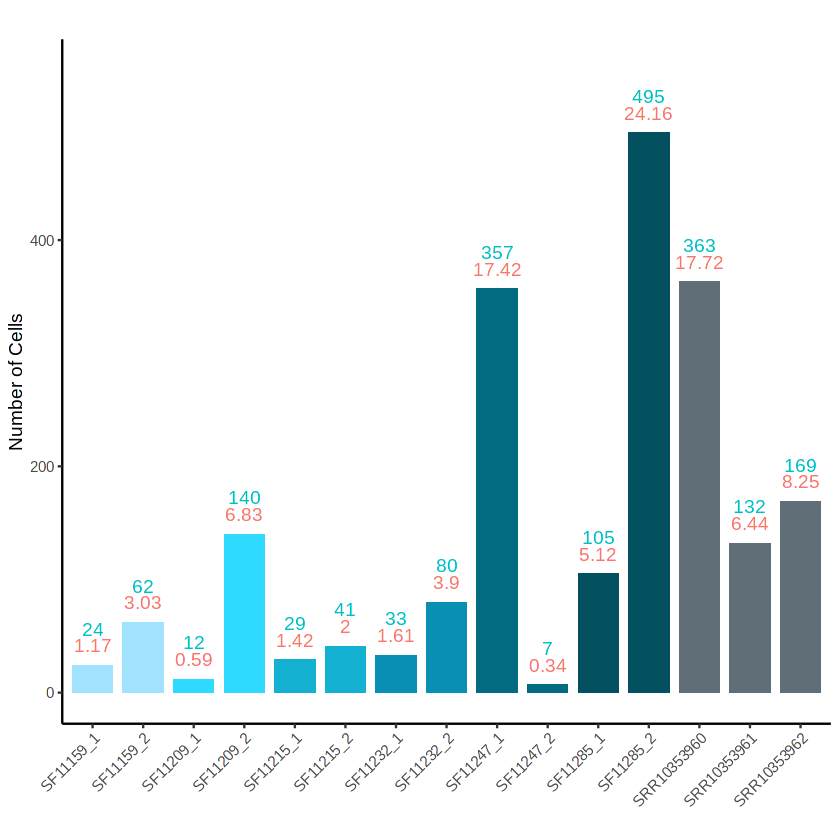

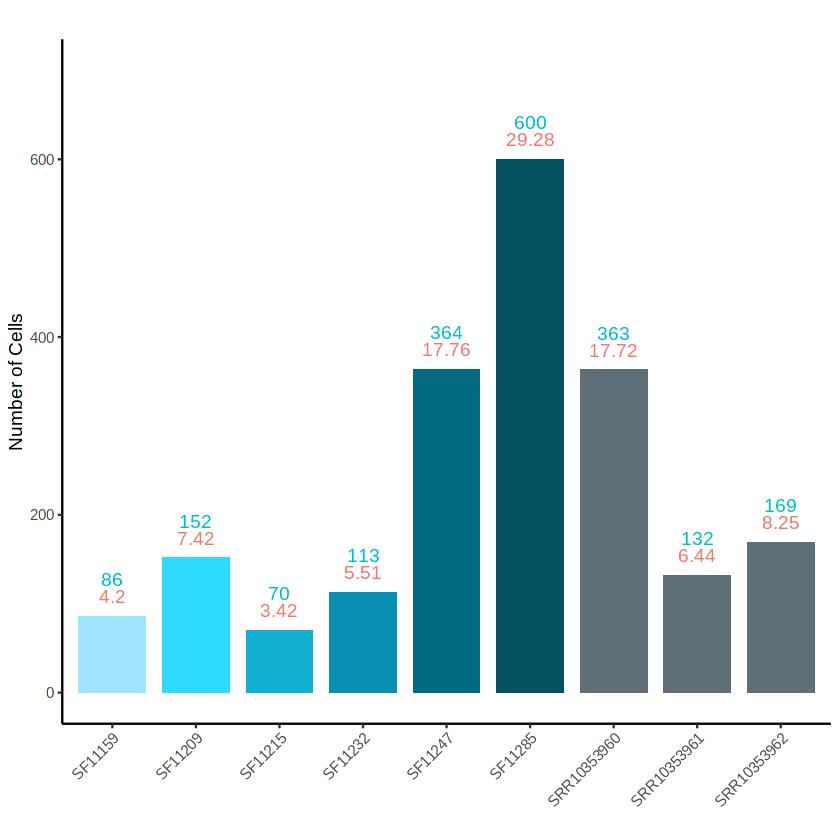

In [57]:
# Barplots of the two 
dfSample %>% 
    ggplot(aes(x = sample, y = n, fill=sample)) + geom_bar( stat = "identity", width = 0.8, position="dodge") + 
    scale_fill_manual(values=gbmcol) + 
    ggtitle("") + labs(y = "Number of Cells", x = "") + ylim(0,550) +
    geom_text(aes(label = round(Freq, 2), col = darkgray), vjust = -1) +
    geom_text(aes(label = n, col = "steelblue"), vjust = -2.3) +
    theme_classic() + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) & NoLegend()
ggsave("gbmsc_gte_cluster7perSample_count.tiff", units="in", width=6, height=6, dpi=300, compression = 'lzw')

dfSampleC %>% 
    ggplot(aes(x = sampleCombined, y = n, fill=sampleCombined)) + geom_bar( stat = "identity", width = 0.8, position="dodge") + 
    scale_fill_manual(values=gbmcolC) + 
    ggtitle("") + labs(y = "Number of Cells", x = "") + ylim(0,700) +
    geom_text(aes(label = round(Freq, 2), col = darkgray), vjust = -1) +
    geom_text(aes(label = n, col = "steelblue"), vjust = -2.3) +
    theme_classic() + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) & NoLegend()
ggsave("gbmsc_gte_cluster7perSampleC_count.tiff", units="in", width=6, height=6, dpi=300, compression = 'lzw')

## End of Notebook

In [3]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /cvmfs/soft.computecanada.ca/easybuild/software/2020/Core/imkl/2020.1.217/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin/libmkl_gf_lp64.so

locale:
 [1] LC_CTYPE=en_CA.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_CA.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_CA.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ggforce_0.3.3           RColorBrewer_1.1-2      GO.db_3.12.1           
 [4] org.Hs.eg.db_3.12.0     GOstats_2.56.0          graph_1.68.0           
 [7] Category_2.56.0     